In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('RSS_project_survey_data.csv')
df.head(2)

,Names,Have you used an RSS reader?,How long have you been using an RSS reader?,How many RSS feeds reader have you used in the past?,How frequently do you use the RSS feed reader?,What is your preferred platform for the RSS reader?,What is your preferred device?,Which method do you prefer for adding RSS feeds?,"Number of Feed sources (websites, blogs, newsletters, magazine etc.) that you use the RSS reader to manage",Which features of the RSS reader do you currently like or will like to have?,Which features of an RSS reader are you likely to find unpleasant?,Can you explain if this app design is user-friendly?,Response Type,Network ID,Tags
0,bfmhuc1rb2cr8tbfms9dl2o77lb0lois,"Yes, I have used one in the past but not at th...",More than 2 years but less than 5 years,2,Several times in a day,Web Browser,Desktop,URL links,1,Grouping of feeds according to feed sources,Poor and extremely complicated user interface,Alternative Phrases,completed,87b2df75ed,NaN
1,323cerpby71tx029q8e3323cerqkqz07,NaN,Less than 2 years,1,Once in a day,Web Browser,Desktop,Social media #tags,Less than 5,Feature to mark an article as read or unread,Cluttered or badly organized content,The design lacks originality,completed,87b2df75ed,NaN


In [90]:
columns = df.columns
df.columns = df.columns.str.lower()

In [91]:
df.columns

Index(['names', 'have you used an rss reader?',
       'how long have you been using an rss reader?',
       'how many rss feeds reader have you used in the past?',
       'how frequently do you use the rss feed reader?',
       'what is your preferred platform for the rss reader?',
       'what is your preferred device?',
       'which method do you prefer for adding rss feeds?',
       'number of feed sources (websites, blogs, newsletters, magazine etc.) that you use the rss reader to manage',
       'which features of the rss reader do you currently like or will like to have?',
       'which features of an rss reader are you likely to find unpleasant?',
       'can you explain if this app design is user-friendly?', 'response type',
       'network id', 'tags'],
      dtype='object')

In [92]:
df.drop(columns={'names','response type','network id', 'tags' }, inplace=True)

In [93]:
dropped_columns = {'names','response type','network id', 'tags' }
columns = [x for x in columns if x.lower() not in dropped_columns]
df.columns = columns
# df
# len(columns)

In [94]:
df.head(0)

,Have you used an RSS reader?,How long have you been using an RSS reader?,How many RSS feeds reader have you used in the past?,How frequently do you use the RSS feed reader?,What is your preferred platform for the RSS reader?,What is your preferred device?,Which method do you prefer for adding RSS feeds?,"Number of Feed sources (websites, blogs, newsletters, magazine etc.) that you use the RSS reader to manage",Which features of the RSS reader do you currently like or will like to have?,Which features of an RSS reader are you likely to find unpleasant?,Can you explain if this app design is user-friendly?


In [95]:
df.nunique()

Have you used an RSS reader?                                                                                   3
How long have you been using an RSS reader?                                                                    3
How many RSS feeds reader have you used in the past?                                                           5
How frequently do you use the RSS feed reader?                                                                 4
What is your preferred platform for the RSS reader?                                                            4
What is your preferred device?                                                                                 4
Which method do you prefer for adding RSS feeds?                                                               4
Number of Feed sources (websites, blogs, newsletters, magazine etc.) that you use the RSS reader to manage     4
Which features of the RSS reader do you currently like or will like to have?                    

In [96]:
df.isna().sum()

Have you used an RSS reader?                                                                                  1
How long have you been using an RSS reader?                                                                   0
How many RSS feeds reader have you used in the past?                                                          0
How frequently do you use the RSS feed reader?                                                                0
What is your preferred platform for the RSS reader?                                                           0
What is your preferred device?                                                                                0
Which method do you prefer for adding RSS feeds?                                                              0
Number of Feed sources (websites, blogs, newsletters, magazine etc.) that you use the RSS reader to manage    0
Which features of the RSS reader do you currently like or will like to have?                            

##### Investigate the column 'have you used an rss reader?' and filled NA

In [97]:
df.iloc[:, 0].value_counts()

Have you used an RSS reader?
Yes, I currently use one                                  13
No, I have never used one                                 11
Yes, I have used one in the past but not at the moment    10
Name: count, dtype: int64

In [98]:
filter = df.iloc[:, 0].isna()
df[filter]

,Have you used an RSS reader?,How long have you been using an RSS reader?,How many RSS feeds reader have you used in the past?,How frequently do you use the RSS feed reader?,What is your preferred platform for the RSS reader?,What is your preferred device?,Which method do you prefer for adding RSS feeds?,"Number of Feed sources (websites, blogs, newsletters, magazine etc.) that you use the RSS reader to manage",Which features of the RSS reader do you currently like or will like to have?,Which features of an RSS reader are you likely to find unpleasant?,Can you explain if this app design is user-friendly?
1,NaN,Less than 2 years,1,Once in a day,Web Browser,Desktop,Social media #tags,Less than 5,Feature to mark an article as read or unread,Cluttered or badly organized content,The design lacks originality


In [99]:
df.iloc[1, 0] = 'Yes, I currently use one'
# verify that there are no NA values in the dataframe
df.isna().sum().sum()

0

In [100]:
df.shape

(35, 11)

##### Percentage of Respondent that uses RSS reader

<Axes: title={'center': 'Have you used an RSS reader?'}>

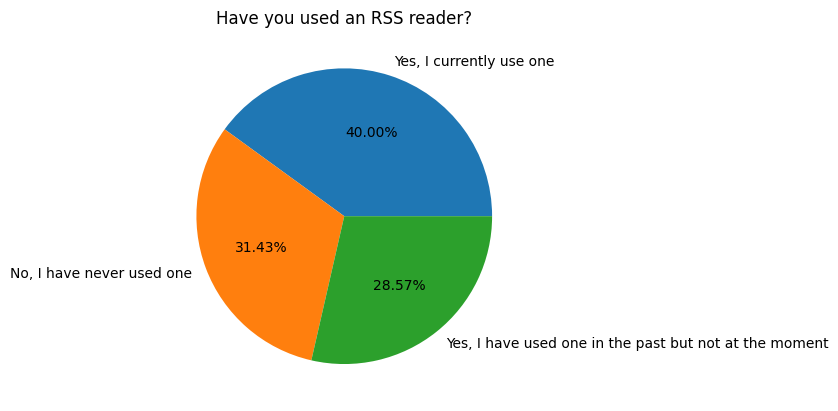

In [101]:
df.iloc[:, 0].value_counts().plot.pie(autopct="%.2f%%",title="Have you used an RSS reader?", ylabel='')

In [ ]:
# def visualise(series_input):
#     series_input.value_counts().plot.pie(subplots=True, figsize=(16, 8),autopct="%.2f%%",title=series_input.name, ylabel='')
# df.columns

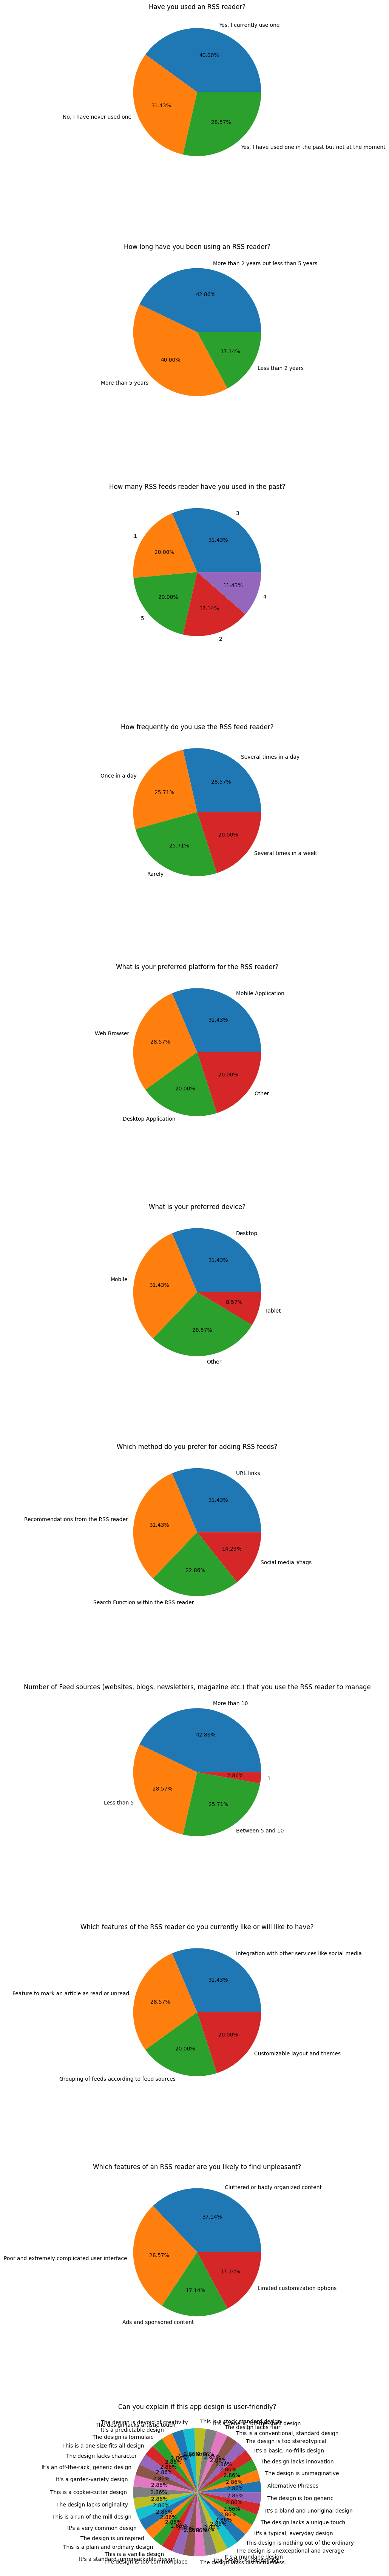

In [104]:
# create a subplot and set the figure size
nPlot = len(df.columns)
fig, axs = plt.subplots(nPlot, 1, figsize=(12, 8 * nPlot))
# fig, axs = plt.subplots(4, 2, figsize=(16, 24))

for ax, column in zip(axs.flat, df.columns):
     # set the subplot title to the name of the column
    ax.set_title(column)
    
    # plot a pie chart for each of the column
    df[column].value_counts().plot.pie(ax=ax, autopct="%.2f%%", ylabel='')
    
# create vertical space to avoid overlapping labels
plt.subplots_adjust(wspace=0.2, hspace=0.5)
